![Spotify Logo](https://2672686a4cf38e8c2458-2712e00ea34e3076747650c92426bbb5.ssl.cf1.rackcdn.com/2019-02-06-06-11-02.png)

# Introduction

Spotify, founded on 23rd April 2006, is the world's largest music streaming service provider, with over 365 million monthly active users, including 165 million paying subscribers, as of June 2021.

In Spotify's apps, music can be browsed or searched for via various parameters, such as artist, album, genre, playlist, or record label. Users can create, edit and share playlists, share tracks on social media, and make playlists with other users. Spotify provides access to over 70 million songs, 2.2 million podcasts and 4 billion playlists.

As a popular music streaming service, it is used by a large number of people all over the world on a daily basis. One way in which Spotify keeps its users not only satisfied with, but also hooked to the platform, is by making smart and personal recommendations to users based on their listening history.

Such recommendation systems are used by many more companies to provide a highly personal user experience.

In this notebook, I will be developing a basic content-based recommendation system for Spotify. This begins with a gentle introduction to content-based recommendation systems and the underlying concepts. Further, I will be performing basic Exploratory Data Analysis (EDA) before going on to build the recommendation system.

# Content-based Recommendation Systems

**What are recommendation systems?**

Recommender systems are active information filtering systems which personalize the information coming to a user based on their interests, relevance of the information etc. Recommender systems are used widely for recommending movies, articles, restaurants, places to visit, items to buy etc.

Simply put, recommendation systems "recommend" personalized content on the basis of user’s past/current preference to improve the user experience. Broadly, there are two types of recommendation systems – **Content-based & Collaborative filtering based**.

YouTube sugesting relevant videos to viewers based on their previous browsing history, as well as LinkedIn suggesting users to connect with other users they may know, are instances of recommendation systems in action.

**Important terms related to recommendation systems**

1. **Item:** In the context of recommendation systems, an **item** refers to content whose characteristics are used in the recommender models. These could be movies, documents, book etc. In this case, each song available on Spotify is an item.

2. **Attribute:** An **attribute** refers to the characteristic of an item. In this case, each song (item) has different characteristics such as tempo, genre, acousticness, etc.

**How does a content-based recommendation system work?**

Content-based filtering methods are based on a description of the item and a profile of the user's preferences. Content-based recommenders treat recommendation as a user-specific classification problem and learn a classifier for the user's likes and dislikes based on an item's features.

Basically, these methods use an item profile (i.e., a set of discrete attributes and characteristics) characterizing the item within the system. To abstract the features of the items in the system, an item presentation algorithm is applied. A widely used algorithm is the **vector space representation**.

Such a content-based recommendation system makes recommendations based on the "proximity" of an item's vector to the vector of an item that the user likes. Those items whose vector representations are close to the vector representation of an item already liked by the user are recommended.

**Vector space model for recommendation systems**

The Vector Space Model is used commonly in content-based recommendation systems. In this model, each item is represented as a **vector of its attributes** in an n-dimensional space and the angle between the vectors is calculated to determine the similarity between the vectors.

**Cosine similarity measure** is widely used to determine the proximity of two vectors represented using this model, and ultimately give a measure of the similarity between the vectors.

**An example**

As an example, consider the songs *This Means War (Artist: Avenged Sevenfold; Genre: Heavy Metal)*, *Sad But True (Artist: Metallica; Genre: Heavy Metal)*, *Juice (Artist: Lizzo; Genre: Pop/Funk/Rock)* and *Something Big (Artist: Shawn Mendes; Genre: Pop)*.

Using the vector space model, the four songs (items) may be represented in terms of the two attributes 'acousticness' and 'tempo' as shown below.

![](https://drive.google.com/uc?export=view&id=172FHhvj_Zg8v0BYqQjX3ITw-3_nlt5zS)

As shown, the vectors for the first two songs are closer to each other than to the other two songs. Vectors that lie closer to each other in the vector space have a small angle between them. In turn, the value of the cosine of this angle between the vectors will be high. This measure can be used to determine the similarity between two vectors, and hence two songs (items).

Hence, a content-based recommendation system will recommend the song *Sad But True* to a user who likes the song *This Means War*. Similarly, a user who likes *Juice* may be recommended *Something Big*, and not *Sad But True*.

This is the basic concept behind the recommendation system that I will be developing in this notebook.

# Data

## Data Description

[Yamac Eren Ay](https://www.kaggle.com/yamaerenay) has collected a Spotify dataset, containing details of ~600,000 songs/tracks, using the Spotify Web API. This amazing dataset is available on Kaggle, check it out [here](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks).

The latest version of the dataset consists of the following files:

1. **artists.csv:** Details of 1.1M artists on Spotify.
2. **data_by_artist_o.csv:** Audio features for each artist.
3. **data_by_genres_o.csv:** Audio features for each genre.
4. **data_by_year_o.csv:** Audio features of songs in different year.
5. **data_o.csv:** Original data containing audio features of tracks.
6. **tracks.csv:** Audio features of 600k tracks available on Spotify.

Some of the audio features that describe songs/tracks are:

1. **Acousticness:** Whether the song/track is acoustic or not.
2. **Tempo:** The tempo of the song/track, measured in beats per minute (BPM).
3. **Energy:** How energetic the song/track is.
4. **Liveness:** Whether a live audience is present or the song/track is studio recorded.
5. **Valence:** How positive the the music is.

These features are the attributes that describe each item, and will be used to determine vectors for each item (song/track).

I have performed data transformation for this dataset to convert the exisiting data into a more usable form for modelling and developing the recommendation system. The final data that I will be using to develop the recommendation system is the **tracks_transformed.csv** and **artists_transformed.csv** file.

Check out the [data preprocessing and transformation notebook](https://github.com/prathamSharma25/Spotify-CBRS/blob/main/Spotify_Data_Transformation.ipynb).

In [1]:
# To read and handle data files
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# For handling arrays and vectors
import numpy as np

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline

# For creating wordcloud
from wordcloud import WordCloud

# For string manipulation
import string

# For creating vectors from text and determining similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# To display DataFrame
from IPython.display import display

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data file and display first 5 records
tracks = pd.read_csv('tracks_transformed.csv', na_filter=False)
tracks.head()

,id,name,artists,id_artists,genres,release_year,duration_s,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,35iwgR4jXetI318WEWsa1Q,Carve,Uli,['45tIt06XoI0Iio4LBEVpls'],,1922,126.903,6,0.645,0.4450,0,46.662,1,0.4510,0.674,0.7440,0.151,0.127,104.851
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],,1922,98.200,0,0.695,0.2630,0,37.864,1,0.9570,0.797,0.0000,0.148,0.655,102.009
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],tango vintage tango,1922,181.640,0,0.434,0.1770,1,38.820,1,0.0512,0.994,0.0218,0.212,0.457,130.418
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],tango vintage tango,1922,176.907,0,0.321,0.0946,7,32.039,1,0.0504,0.995,0.9180,0.104,0.397,169.980
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],adult standards big band easy listening lounge...,1922,163.080,0,0.402,0.1580,3,43.100,0,0.0390,0.989,0.1300,0.311,0.196,103.220


In [3]:
# Read artists data file
artists = pd.read_csv('artists_transformed.csv')

# Drop rows with null values
artists.dropna(inplace=True)

# Convert "followers" field to numeric
artists['followers'] = pd.to_numeric(artists['followers'])

# Display first 5 records
artists.head()

,id,followers,genres,name,popularity
45,0VLMVnVbJyJ4oyZs2L3Yl2,71.0,carnaval cadiz,Las Viudas De Los Bisabuelos,6
46,0dt23bs4w8zx154C5xdVyl,63.0,carnaval cadiz,Los De Capuchinos,5
47,0pGhoB99qpEJEsBQxgaskQ,64.0,carnaval cadiz,Los “Pofesionales”,7
48,3HDrX2OtSuXLW5dLR85uN3,53.0,carnaval cadiz,Los Que No Paran De Rajar,6
136,22mLrN5fkppmuUPsHx6i2G,59.0,classical harp harp,Vera Dulova,3


In [4]:
# Read genres data file and display first 5 records
genres = pd.read_csv('Dataset/data_by_genres_o.csv', na_filter=False)
genres.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


# Exploratory Data Analysis

### 1. Summary statistics

Let's first take a quick look at the summary statistics for the tracks, artists and genres data. This will give us a number of statistical measures, such as mean value, median value, and maximum value, for each numerical field in the data.

#### 1.1. Tracks data

In [5]:
# Display summary statistics for tracks data
tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
release_year,586672.0,1988.566168,22.831283,1900.000,1974.0000,1992.000000,2007.00000,2021.000
duration_s,586672.0,230.051167,126.526087,3.344,175.0930,214.893000,263.86700,5621.218
popularity,586672.0,27.570053,18.370642,0.000,13.0000,27.000000,41.00000,100.000
danceability,586672.0,0.563594,0.166103,0.000,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.000,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.000,2.0000,5.000000,8.00000,11.000
loudness,586672.0,49.793933,5.089328,0.000,47.1090,50.757000,53.51800,65.376
mode,586672.0,0.658797,0.474114,0.000,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.000,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.000,0.0969,0.422000,0.78500,0.996


Some observations:

1. The tracks data contains songs that were released as early as in 1900, up untill 2021.
2. The longest song/track is about **5621 seconds (93 minutes)** long, and the shortest song/track is only **3 seconds** long.
3. On average, the songs are fairly danceable (mean value = 0.563) and energetic (mean value = 0.542).
4. The mean tempo for songs/tracks on Spotify is about 118 beats per minute (BPM), while the fastest song has a tempo of **246.381 BPM**.

#### 1.2. Artists data

In [6]:
# Display summary statistics for artists data
artists.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
followers,298610.0,38506.674743,500715.449177,0.0,157.0,894.0,5221.75,78900234.0
popularity,298610.0,19.535937,17.527959,0.0,4.0,16.0,32.00,100.0


Some observations:

1. The most followed artist on Spotify has **78.90 million** followers.
2. On average, an artist on Spotify has about 38,506 followers.

### 2. Most popular songs/tracks

Let's now visualize the data available through some basic charts to gain some more insight.

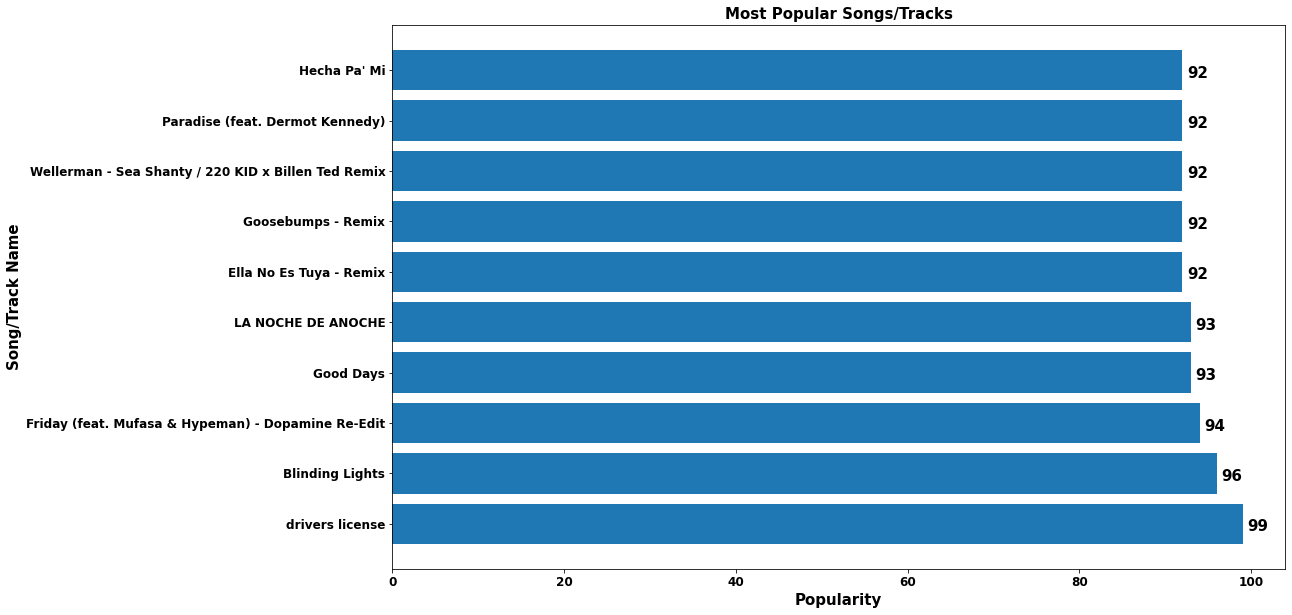

In [7]:
# Get top 10 most popular tracks
popular_songs = tracks.groupby('name')['popularity'].mean().sort_values(ascending=False).head(10)

# Plot horizontal bar chart
plt.figure(figsize=(16, 10))
plt.barh(popular_songs.index, popular_songs)
plt.title('Most Popular Songs/Tracks', fontdict=dict(fontsize=15), fontweight='bold')
plt.xlabel('Popularity', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Song/Track Name', fontdict=dict(fontsize=15), fontweight='bold')
plt.xticks(fontsize='large', weight='bold')
plt.yticks(fontsize='large', weight='bold')
for i, v in enumerate(popular_songs):
    plt.text(v+0.5, i-0.15, str(int(v)), fontdict=dict(fontsize=15), fontweight='bold')
plt.show()

The most popular song on Spotify (in terms of popularity rating) is **Olivia Rodrigo's drivers license**, with a popularity rating of 99.

The 2nd most popular song is **Blinding Lights by The Weeknd**, followed by **Friday** in 3rd.

### 3. Most popular artists

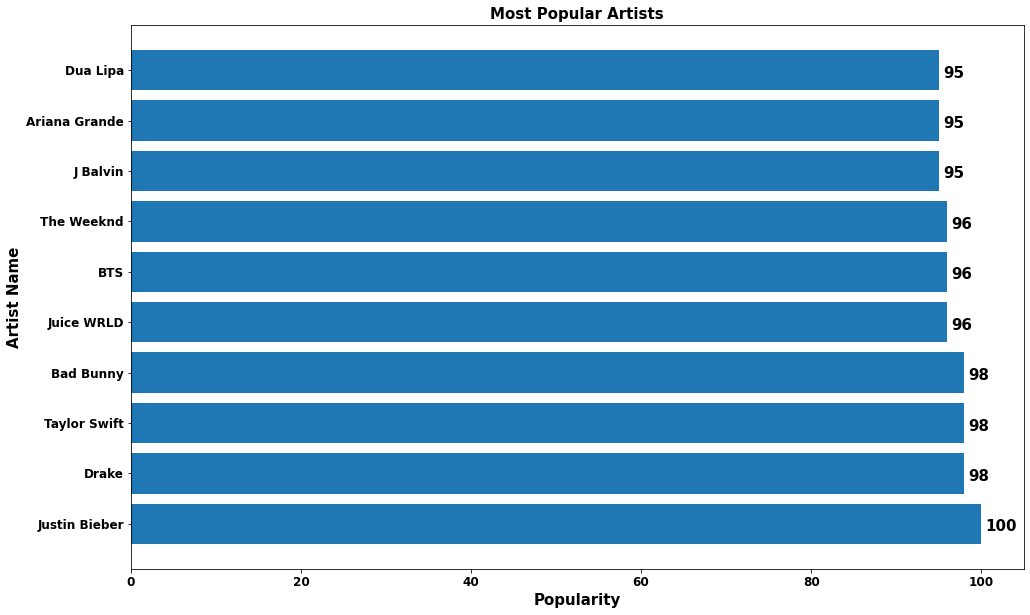

In [8]:
# Get top 10 most popular artists
popular_artists = artists.groupby('name')['popularity'].mean().sort_values(ascending=False).head(10)

# Plot horizontal bar chart
plt.figure(figsize=(16, 10))
plt.barh(popular_artists.index, popular_artists)
plt.title('Most Popular Artists', fontdict=dict(fontsize=15), fontweight='bold')
plt.xlabel('Popularity', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Artist Name', fontdict=dict(fontsize=15), fontweight='bold')
plt.xticks(fontsize='large', weight='bold')
plt.yticks(fontsize='large', weight='bold')
for i, v in enumerate(popular_artists):
    plt.text(v+0.5, i-0.15, str(int(v)), fontdict=dict(fontsize=15), fontweight='bold')
plt.show()

The most popular artist on Spotify (in terms of popularity rating) is **Justin Bieber**, with a popularity rating of 100, followed by **Bad Bunny** and **Drake**.

However, Justing Bieber is not the most followed artist, as we will see next.

### 4. Most followed artists

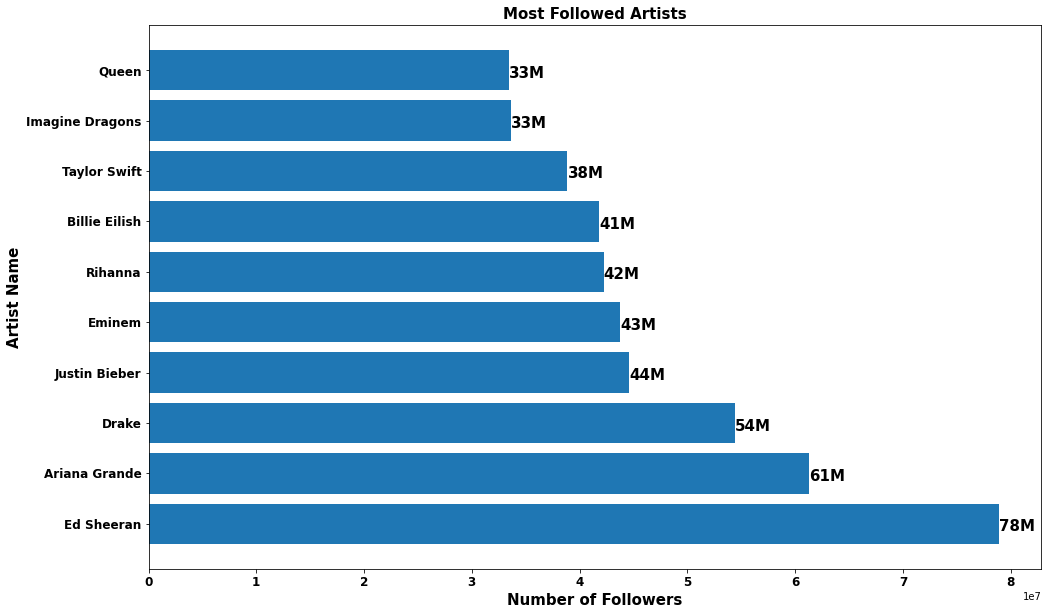

In [9]:
# Get top 10 most followed artists
popular_artists = artists.groupby('name')['followers'].mean().sort_values(ascending=False).head(10)

# Plot horizontal bar chart
plt.figure(figsize=(16, 10))
plt.barh(popular_artists.index, popular_artists)
plt.title('Most Followed Artists', fontdict=dict(fontsize=15), fontweight='bold')
plt.xlabel('Number of Followers', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Artist Name', fontdict=dict(fontsize=15), fontweight='bold')
plt.xticks(fontsize='large', weight='bold')
plt.yticks(fontsize='large', weight='bold')
for i, v in enumerate(popular_artists):
    plt.text(v+0.5, i-0.15, str(int(v//1000000))+'M', fontdict=dict(fontsize=15), fontweight='bold')
plt.show()

Justin Bieber falls to 4th place in term of number of folllowers on Spotify, behind Drake, who has a lower popularity rating.

The most followed artist on Spotify is **Ed Sheeran**, with a massive 78.9 million followers.

### 5. Genre WordCloud

Here is a wordcloud generated using the different genres available in the genres data.

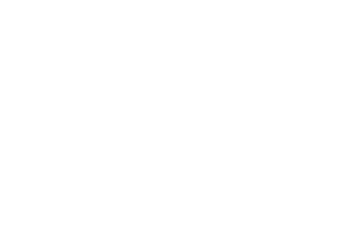

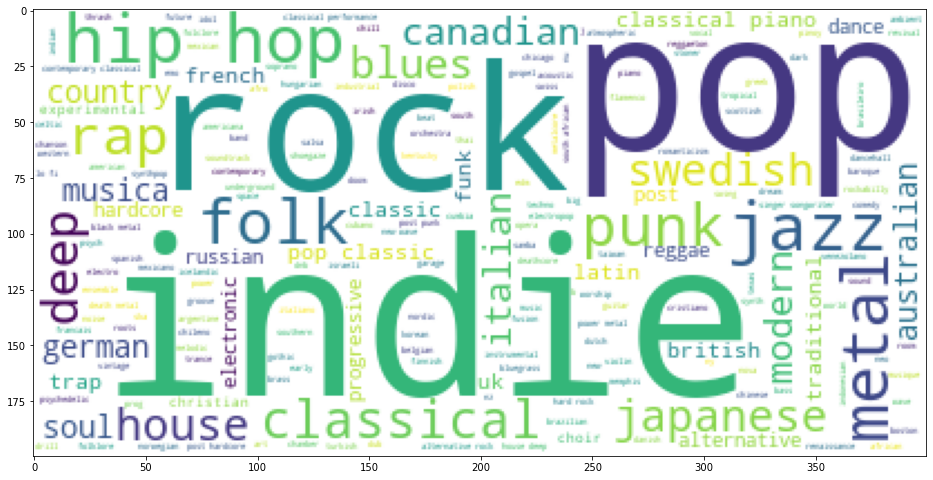

In [10]:
# Text from "genre" column in genres data
genre_text = ' '.join(genre for genre in genres.genres.astype(str))

# Generate wordcloud using text
wc = WordCloud(background_color="white")
wordcloud = wc.generate(genre_text)

# Display wordcloud
plt.axis('off')
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud)
plt.show()

### 6. Most popular genres

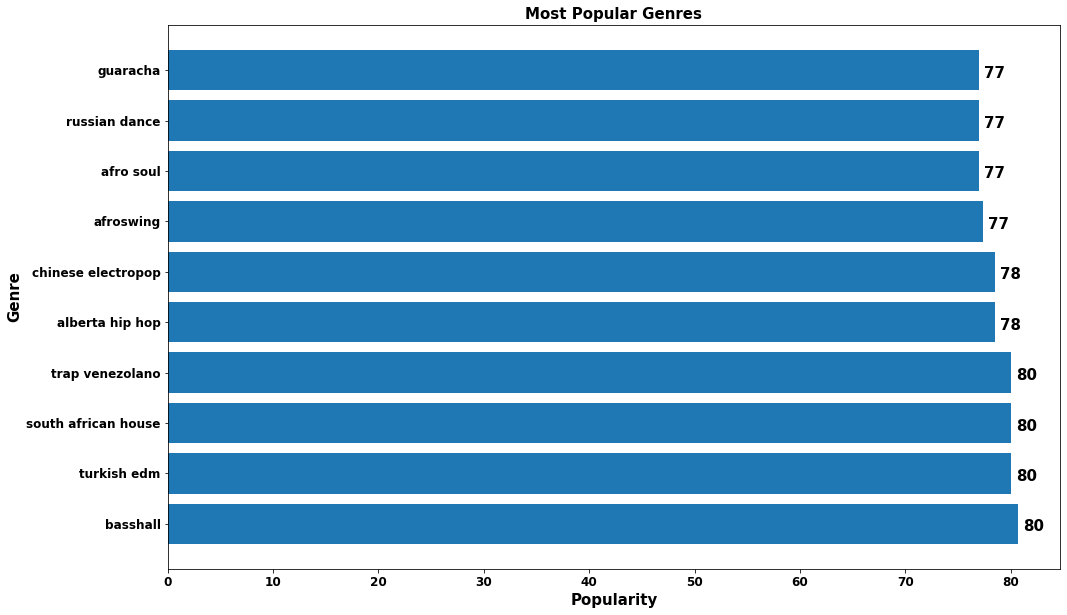

In [11]:
# Get top 10 most popular genres
popular_genres = genres.groupby('genres')['popularity'].mean().sort_values(ascending=False).head(10)

# Plot horizontal bar chart
plt.figure(figsize=(16, 10))
plt.barh(popular_genres.index, popular_genres)
plt.title('Most Popular Genres', fontdict=dict(fontsize=15), fontweight='bold')
plt.xlabel('Popularity', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Genre', fontdict=dict(fontsize=15), fontweight='bold')
plt.xticks(fontsize='large', weight='bold')
plt.yticks(fontsize='large', weight='bold')
for i, v in enumerate(popular_genres):
    plt.text(v+0.5, i-0.15, str(int(v)), fontdict=dict(fontsize=15), fontweight='bold')
plt.show()

The above chart shows the most popular music genres, based on the popularity rating.

The most popular genre is **basshall**, followed by **turkish edm** and **south african house**.

# Modelling

In this section, I will be developing the content-based recommendation system, based on the vector space model described above.

For modelling, I have used tracks data, which contains information about each song/track, including a number of audio features as well as the music genre of that song.

To use the genre information (text data) in the vector space model, I have transformed the genres text into a vector using the **CountVectorizer** toool available in the sklearn library.

The audio features are numerical values which can be used directly to create a vector to represent each song in the vector space model.

Finally, the similarity between two songs is determined using the cosine similarity metric, based on the vectors generated for each song.

## Song recommender

In this section, I have created a function to recommend songs based on an input song name. Songs similar to the one provided to the function are determined using the vector space model explained above.

For demonstration purpose, I have reduced the size of the song library to only the top 10,000 most popular songs, based on the popularity rating.

In [12]:
# Sort tracks data based on popularity and take first 10,000 records
song_library = tracks.sort_values(by=['popularity'], ascending=False).head(10000)

# Drop "id_artists" field from DataFrame
song_library.drop(['id_artists'], axis=1, inplace=True)

# Reset index for DataFrame
song_library.reset_index(inplace=True, drop=True)

# Display first 5 records
song_library.head()

,id,name,artists,genres,release_year,duration_s,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),"Justin Bieber, Daniel Caesar, Giveon",pop rb canadian contemporary rb pop rb canadia...,2021,198.082,100,0.677,0.696,0,53.819,1,0.1190,0.3210,0.000000,0.420,0.464,90.030
1,7lPN2DXiMsVn7XUKtOW1CS,drivers license,Olivia Rodrigo,pop postteen pop,2021,242.014,99,0.585,0.436,10,51.239,1,0.0601,0.7210,0.000013,0.105,0.132,143.874
2,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,Masked Wolf,australian hip hop,2021,132.780,98,0.778,0.695,4,53.135,0,0.0913,0.1750,0.000000,0.150,0.472,149.996
3,5QO79kh1waicV47BqGRL3g,Save Your Tears,The Weeknd,canadian contemporary rb canadian pop pop,2020,215.627,97,0.680,0.826,0,54.513,1,0.0309,0.0212,0.000012,0.543,0.644,118.051
4,6tDDoYIxWvMLTdKpjFkc1B,telepatía,Kali Uchis,colombian pop pop,2020,160.191,97,0.653,0.524,11,50.984,0,0.0502,0.1120,0.000000,0.203,0.553,83.970


In [13]:
# Create CountVectorizer object to transform text into vector
song_vectorizer = CountVectorizer()

# Fit the vectorizer on "genres" field of song_library DataFrame
song_vectorizer.fit(song_library['genres'])

CountVectorizer()

In [14]:
# Function to recommend more songs based on given song name
def song_recommender(song_name):
    try:
        # Numeric columns (audio features) in song_library DataFrame
        num_cols = ['release_year', 'duration_s', 'popularity', 'danceability', 'energy', 'key', 'loudness',
                    'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

        # Create vector from "genres" field (text data) for given song
        text_vec1 = song_vectorizer.transform(song_library[song_library['name']==str(song_name)]['genres']).toarray()

        # Create vector from numerical columns for given song
        num_vec1 = song_library[song_library['name']==str(song_name)][num_cols].to_numpy()

        # Initialise empty list to store similarity scores
        sim_scores=  []

        # For every song/track in song library, determine cosine similarity with given song
        for index, row in song_library.iterrows():
            name = row['name']

            # Create vector from "genres" field for other songs
            text_vec2 = song_vectorizer.transform(song_library[song_library['name']==name]['genres']).toarray()

            # Create vector from numerical columns for other songs
            num_vec2 = song_library[song_library['name']==name][num_cols].to_numpy()

            # Calculate cosine similarity using text vectors
            text_sim = cosine_similarity(text_vec1, text_vec2)[0][0]

            # Calculate cosine similarity using numerical vectors
            num_sim = cosine_similarity(num_vec1, num_vec2)[0][0]

            # Take average of both similarity scores and add to list of similarity scores
            sim = (text_sim + num_sim)/2
            sim_scores.append(sim)
        
        # Add new column containing similarity scores to song_library DataFrame
        song_library['similarity'] = sim_scores

        # Sort DataFrame based on "similarity" column
        song_library.sort_values(by=['similarity', 'popularity', 'release_year'], ascending=[False, False, False], inplace=True)

        # Create DataFrame "recommended_songs" containing 5 songs that are most similar to the given song and return this DataFrame
        recommended_songs = song_library[['name', 'artists', 'release_year']][2:7]
        return recommended_songs
    except:
        # If given song is not found in song library then display message
        print('{} not found in songs library.'.format(song_name))

In [15]:
# More songs like Hail to the King by Avenged Sevenfold
song_recommender('Hail to the King')

,name,artists,release_year
2939,All Summer Long,Kid Rock,2007
8540,Shepherd of Fire,Avenged Sevenfold,2013
7399,Afterlife,Avenged Sevenfold,2007
9141,A Little Piece of Heaven,Avenged Sevenfold,2007
1763,Down with the Sickness,Disturbed,2000


In [16]:
# More songs like Eye of the Tiger by Survivor
song_recommender('Eye of the Tiger')

,name,artists,release_year
9286,"Burning Heart - From ""Rocky IV"" Soundtrack",Survivor,1993
8053,Burnin' for You,Blue Öyster Cult,1981
1841,(Don't Fear) The Reaper,Blue Öyster Cult,1976
495,Don't Stop Believin',Journey,1981
2495,Don't Stop Believin',Journey,2001


In [17]:
# More songs like Blinding Lights by The Weeknd
song_recommender('Blinding Lights')

,name,artists,release_year
852,Heartless,Kanye West,2008
3279,Reminder,The Weeknd,2016
6393,False Alarm,The Weeknd,2016
3745,In The Night,The Weeknd,2015
386,Call Out My Name,The Weeknd,2018


## Artists recommender

In the same way that I created the *song_recommender()* function, I have created a similar function to recommend similar artists based on the artist name given. The concept behind both recommender functions is the same, with the only difference being the data used.

Again, for demonstration purposes, I have taken the top 10,000 most popular artists from the pool of all artists.

In [18]:
# Sort artists data based on popularity and take first 10,000 records
artist_library = artists.sort_values(by=['popularity', 'followers'], ascending=[False, False]).head(10000)

# Reset index for DataFrame
artist_library.reset_index(inplace=True, drop=True)

# Display first 5 records
artist_library.head()

,id,followers,genres,name,popularity
0,1uNFoZAHBGtllmzznpCI3s,44606973.0,canadian pop pop postteen pop,Justin Bieber,100
1,3TVXtAsR1Inumwj472S9r4,54416812.0,canadian hip hop canadian pop hip hop pop rap ...,Drake,98
2,06HL4z0CvFAxyc27GXpf02,38869193.0,pop postteen pop,Taylor Swift,98
3,4q3ewBCX7sLwd24euuV69X,32244734.0,latin reggaeton trap latino,Bad Bunny,98
4,3Nrfpe0tUJi4K4DXYWgMUX,31623813.0,kpop kpop boy group,BTS,96


In [19]:
# Create CountVectorizer object to transform text into vector
artist_vectorizer = CountVectorizer()

# Fit the vectorizer on "genres" field of song_library DataFrame
artist_vectorizer.fit(artist_library['genres'])

CountVectorizer()

In [20]:
# Function to recommend more artists based on given artist name
def artist_recommender(artist_name):
    try:
        # Numeric columns (audio features) in artist_library DataFrame
        num_cols = ['followers', 'popularity']

        # Create vector from "genres" field (text data) for given artist
        text_vec1 = artist_vectorizer.transform(artist_library[artist_library['name']==str(artist_name)]['genres']).toarray()

        # Create vector from numerical columns for given song
        num_vec1 = artist_library[artist_library['name']==str(artist_name)][num_cols].to_numpy()

        # Initialise empty list to store similarity scores
        sim_scores = []

        # For every artist in artist library, determine cosine similarity with given artist
        for index, row in artist_library.iterrows():
            name = row['name']

            # Create vector from "genres" field for other artists
            text_vec2 = artist_vectorizer.transform(artist_library[artist_library['name']==name]['genres']).toarray()

            # Create vector from numerical columns for other songs
            num_vec2 = artist_library[artist_library['name']==name][num_cols].to_numpy()

            # Calculate cosine similarity using text vectors
            text_sim = cosine_similarity(text_vec1, text_vec2)[0][0]

            # Calculate cosine similarity using numerical vectors
            num_sim = cosine_similarity(num_vec1, num_vec2)[0][0]

            # Take average of both similarity scores and add to list of similarity scores
            sim = (text_sim + num_sim)/2
            sim_scores.append(sim)

        # Add new column containing similarity scores to artist_library DataFrame
        artist_library['similarity'] = sim_scores

        # Sort DataFrame based on "similarity" column
        artist_library.sort_values(by=['similarity', 'popularity', 'followers'], ascending=[False, False, False], inplace=True)

        # Create DataFrame "recommended_artists" containing 5 artists that are most similar to the given artist, sort and return this DataFrame
        recommended_artists = artist_library[['name', 'genres', 'followers', 'popularity']][2:7]
        recommended_artists.sort_values(by=['popularity', 'followers'], ascending=[False, False], inplace=True)
        return recommended_artists
    except:
        # If given artist is not found in artist library then display message
        print('{} not found in artists library.'.format(artist_name))

In [21]:
# More artists like Def Leppard
artist_recommender('Def Leppard')

,name,genres,followers,popularity
279,Led Zeppelin,album rock classic rock hard rock rock,10548181.0,81
341,Aerosmith,album rock classic rock hard rock rock,10079991.0,80
686,Van Halen,album rock classic rock hard rock metal rock,3876514.0,76
1572,Survivor,album rock hard rock rock soft rock,703375.0,71
4415,Slash,hard rock rock,2182844.0,63


In [22]:
# More artists like Opeth
artist_recommender('Opeth')

,name,genres,followers,popularity
2044,Gojira,alternative metal french death metal french me...,783263.0,69
2341,In Flames,alternative metal gothenburg metal melodic dea...,874600.0,68
3478,Dream Theater,metal neo classical metal progressive metal rock,1167428.0,65
5097,Mastodon,alternative metal atlanta metal hard rock meta...,645410.0,62
6453,Arch Enemy,alternative metal death metal melodic death me...,661138.0,60


In [23]:
# More artists like Diljit Dosanjh
artist_recommender('Diljit Dosanjh')

,name,genres,followers,popularity
126,Arijit Singh,desi pop filmi modern bollywood,26249666.0,85
557,Neha Kakkar,desi pop filmi modern bollywood,18120286.0,77
1220,Armaan Malik,desi pop filmi modern bollywood,9250478.0,72
2013,Neeti Mohan,desi pop filmi modern bollywood,957869.0,69
3007,Palak Muchhal,desi pop filmi modern bollywood,1604308.0,66


## Complete Spotify Recommender

The function defined in the next code cell brings together the functions *song_recommender()* and *artist_recommender()* to create a complete Spotify recommender function.

In [24]:
# Function to recommend similar songs and artists based on song name
def spotify_recommender(song_name):
    try:
        # Get DataFrame of recommended songs using song_recommender() function
        recommended_songs = song_recommender(song_name)

        # Create empty DataFrame to store details of recommended artists
        recommended_artists = pd.DataFrame({'name':[], 'genres':[], 'followers':[], 'popularity':[]})

        # Get contributing artists for given song
        artists = song_library[song_library['name']==str(song_name)]['artists'].values[0].split(',')

        # For each contributing artist, get recommended artists using artist_recommender() function
        for artist in artists:
            artist_name = artist.strip()

            # Concatenate returned DataFrame with recommended_artists DataFrame
            recommended_artists = pd.concat([recommended_artists, artist_recommender(artist_name)])
        
        # Sort DataFrame based on "popularity" and "followers" columns
        recommended_artists.sort_values(by=['popularity', 'followers'], ascending=[False, False], inplace=True)

        # Display recommended songs    
        print('More songs you might like:')
        display(recommended_songs)

        # Display recommended artists
        print('\n\nOther artists you might like:')
        display(recommended_artists.head())
    except:
        # If given song is not found in song library then display message
        print('{} not found in songs library.'.format(song_name))

In [25]:
# Recommendations for the song "Nero Forte" by Slipknot
spotify_recommender('Nero Forte')

More songs you might like:


,name,artists,release_year
7326,Psychosocial,Slipknot,2008
2790,Before I Forget,Slipknot,2004
7505,Snuff,Slipknot,2008
5111,The Devil in I,Slipknot,2014
3162,Unsainted,Slipknot,2019




Other artists you might like:


,name,genres,followers,popularity
88,Linkin Park,alternative metal nu metal postgrunge rap metal,18611017.0,87.0
426,Disturbed,alternative metal nu metal rap metal,4685829.0,79.0
680,Korn,alternative metal funk metal nu metal rap meta...,4535142.0,76.0
684,Limp Bizkit,alternative metal funk metal nu metal rap meta...,3931967.0,76.0
1251,Godsmack,alternative metal nu metal postgrunge rap metal,2185460.0,72.0


In [26]:
# Recommendations for the song "La Camisa Negra" by Juanes
spotify_recommender('La Camisa Negra')

More songs you might like:


,name,artists,release_year
3207,Es Por Tí,Juanes,2002
3609,Besos En Guerra,"Morat, Juanes",2018
6499,Mi primer millon,Bacilos,2002
8286,Perderme Contigo,Bacilos,2018
2670,Caraluna,Bacilos,2002




Other artists you might like:


,name,genres,followers,popularity
1284,Miguel Bosé,latin latin pop mexican pop rock en espanol sp...,1587578.0,72.0
4544,Kabah,dance pop latin latin pop mexican pop rock en ...,587694.0,63.0
8043,Sentidos Opuestos,dance pop latin latin pop mexican pop rock en ...,647653.0,58.0
8204,Onda Vaselina,latin latin pop mexican pop rock en espanol,310448.0,58.0
9066,Tranzas,ecuadorian pop latin latin pop mexican pop roc...,426550.0,57.0


In [27]:
# Recommendations for the song "Congratulations" by Post Malone
spotify_recommender('Congratulations')

More songs you might like:


,name,artists,release_year
9564,Money Made Me Do It,"Post Malone, 2 Chainz",2016
465,Wolves (feat. Post Malone),"Big Sean, Post Malone",2020
6820,Hard Work Pays Off,"Future, Juice WRLD",2018
8246,Realer N Realer,"Future, Juice WRLD",2018
2201,Fine China,"Future, Juice WRLD",2018




Other artists you might like:


,name,genres,followers,popularity
6,Juice WRLD,chicago rap melodic rap,16996777.0,96.0
30,Lil Uzi Vert,melodic rap philly rap rap trap,11209483.0,91.0
31,Future,atl hip hop pop rap rap southern hip hop trap,10099191.0,91.0
119,A Boogie Wit da Hoodie,melodic rap pop rap rap trap,5634088.0,86.0
198,2 Chainz,atl hip hop gangster rap hip hop pop rap rap s...,6267865.0,83.0


# Conclusion

Hence, this notebook shows the step-by-step procedure to develop a content-based recommendation system for Spotify. The concept explained and implemented can be extended to any other service, say products on Amazon, or courses on Coursera.